# ლექცია 3

## მონაცემების შესწავლა & გაწმენდა

წინა ლექციაზე მოკლედ შევეხეთ მონაცემთა გასუფთავების საკითხს მონაცემთა შეგროვების პროცესის განხილვისას. ამჯერად, პრაქტიკულ მაგალითდან ერთად, უფრო დეტალურად გავაანალიზებთ მონაცემთა გასუფთავებისა და სტანდარტიზაციის მნიშვნელობას, განსაკუთრებით ტექსტური მონაცემების დამუშავების (NLP) კონტექსტში.

* **მონაცემთა გასუფთავება** წარმოადგენს კრიტიკულ ეტაპს, რომლის მიზანიცაა მონაცემთა ხარისხის გაუმჯობესება არასასურველი ელემენტების მოცილებით, შეცდომების გასწორებითა და ისეთი მონაცემების დახვეწით, რომლებმაც შესაძლოა ხელი შეუშალოს ზუსტ ანალიზს. ტექსტური მონაცემების შემთხვევაში, ეს პროცესი მოიცავს დუბლირებული ჩანაწერების აღმოფხვრას, არასასურველი სიმბოლოებისა, ლექსიკის ან ჩანაწერების გაწმენდას, რაც საბოლოოდ აუმჯობესებს მონაცემთა ხარისხს.

* **სტანდარტიზაცია/ნორმალიზაცია**, თავის მხრივ, გულისხმობს მონაცემთა ერთგვაროვან ფორმატში მოყვანას, რაც აადვილებს მათ შედარებასა და ანალიზს. ტექსტური მონაცემებისთვის ეს შეიძლება მოიცავდეს  სიმბოლოების ზომის, ცარიელი სიმბოლოების (' ', იგივე whitespace), ან ახალი ხაზების ('\n', იგივე newline) უნიფიცირებას, რიცხვებისა და თარიღების ფორმატის ერთგვაროვნებას და სხვა. სტანდარტიზაციის საჭიროება განსაკუთრებით თვალსაჩინო ხდება, როდესაც მონაცემები სხვადასხვა წყაროდან არის მოპოვებული და/ან მათი ფორმატი მრავალფეროვანია.

* **LLM-ების გამოყენება მონაცემთა გასუფთავებაში**: ბოლო პერიოდში, დიდი ენობრივი მოდელების (LLM) გამოყენება მონაცემთა გასუფთავების პროცესში სულ უფრო პოპულარული ხდება. LLM-ებს შეუძლიათ დაეხმარონ მკვლევრებს ისეთ ამოცანებში, როგორიცაა ტექსტის კლასიფიკაცია, სემანტიკური დუბლიკატების აღმოჩენა, კონტექსტუალური შეცდომების გასწორება და ტექსტის ნორმალიზაცია.

#### სტანდარტიზაცია/ნორმალიზაციის დროის შერჩევა: გაწმენდამდე თუ გაწმენდის შემდეგ?

სტანდარტიზაციისა და ნორმალიზაციის დროის შერჩევა - გაწმენდამდე თუ გაწმენდის შემდეგ - მნიშვნელოვანი გადაწყვეტილებაა, რომელიც გავლენას ახდენს მთლიან პროცესზე.

ა) გაწმენდამდე სტანდარტიზაცია:

უპირატესობები:
- შეიძლება დაგვეხმაროს დუბლიკატების ან მსგავსი ჩანაწერების იდენტიფიცირებაში
- ამარტივებს გაწმენდის პროცესს, რადგან მონაცემები უკვე ერთგვაროვანია

ნაკლოვანებები:
- შეიძლება დაიკარგოს ზოგიერთი მნიშვნელოვანი ინფორმაცია (მაგ. დიდი ასოებით დაწერილი აბრევიატურები)

ბ) გაწმენდის შემდეგ სტანდარტიზაცია:
უპირატესობები:
- ინარჩუნებს ორიგინალურ ინფორმაციას გაწმენდის პროცესის განმავლობაში
- საშუალებას გვაძლევს გავწმინდოთ მონაცემები უფრო ზუსტად

ნაკლოვანებები:
- შეიძლება გართულდეს დუბლიკატების პოვნა გაწმენდის პროცესში

### ჩავტვირთოთ ვიკიპედიის მონაცემები

(მონაცემების ჩასატვირთად შეგვიძლია გამოვიყენოთ კოდი წინა ლექციიდან)

In [1]:
from datasets import load_dataset

# ჩამოვტვირთოთ მონაცემები
dataset = load_dataset("wikimedia/wikipedia", "20231101.ka", split='train').shuffle().select(range(5000))

# მონაცემთა ვიზუალიზაცია/გამოკვლევისთვის Pandas უფრო მოქნილი/მრავალფუქციურია, ამიტომ მონაცემების გამოსაკვლევად მისი გამოყენება შედარებით მართებულია
df = dataset.to_pandas()
df.head()

Generating train split:   0%|          | 0/169602 [00:00<?, ? examples/s]

,id,url,title,text
0,536704,https://ka.wikipedia.org/wiki/%E1%83%AE%E1%83%...,ხუპიშიჟი,"ხუპიშიჟი, ხუპიშეჟი — ქართული აბორიგენული წითელ..."
1,376366,https://ka.wikipedia.org/wiki/%E1%83%A1%E1%83%...,სევდა (მოთხრობა),"სევდა () — ანტონ ჩეხოვის მოთხრობა, რომელიც 188..."
2,430276,https://ka.wikipedia.org/wiki/Arduino,Arduino,Arduino — ღია-წყაროს მქონე კომპიუტერული პლატფო...
3,377867,https://ka.wikipedia.org/wiki/%E1%83%99%E1%83%...,კრუზეტა,"კრუზეტა () — მუნიციპალიტეტი ბრაზილიაში, რიუ-გრ..."
4,236812,https://ka.wikipedia.org/wiki/%E1%83%A1%E1%83%...,სტეპის წითელი ჯიში,სტეპის წითელი ჯიში — მსხვილი რქოსანი საქონლის...


### მონაცემთა სტრუქტურის გამოკვლევა

In [2]:
# შევამოწმოთ ცვლადების მონაცემთა ტიპი & ნულოვანი დაკვირვებები & რაოდენობა 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   object
 1   url     5000 non-null   object
 2   title   5000 non-null   object
 3   text    5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [3]:
# დავბეჭდოთ ერთი მაგალით საჩვენებლად
sample = df.sample(1)
# ვაჩვენოთ როგორც dictionary (keys-ს იქნება ცვლადების სახელები)
sample.to_dict(orient='records')

[{'id': '344528',
  'url': 'https://ka.wikipedia.org/wiki/%E1%83%9A%E1%83%94%20%E1%83%99%E1%83%9D%E1%83%A0%E1%83%91%E1%83%A3%E1%83%96%E1%83%98%E1%83%94%E1%83%A1%20%E1%83%A8%E1%83%94%E1%83%9C%E1%83%9D%E1%83%91%E1%83%94%E1%83%91%E1%83%98%E1%83%A1%20%E1%83%A1%E1%83%98%E1%83%90',
  'title': 'ლე კორბუზიეს შენობების სია',
  'text': 'აქ წარმოდგენილია არქიტექტორ ლე კორბუზიეს აგებული შენობების სია.\n\nსქოლიო\n\nმსოფლიო მემკვიდრეობის ძეგლები არგენტინაში\nმსოფლიო მემკვიდრეობის ძეგლები ბელგიაში\nმსოფლიო მემკვიდრეობის ძეგლები გერმანიაში\nმსოფლიო მემკვიდრეობის ძეგლები იაპონიაში\nმსოფლიო მემკვიდრეობის ძეგლები ინდოეთში\nმსოფლიო მემკვიდრეობის ძეგლები საფრანგეთში\nმსოფლიო მემკვიდრეობის ძეგლები შვეიცარიაში'}]

### შევამოწმოთ ძირითადი სტატისტიკები 

ძირითადი სტატისტიკების დათვლა მნიშვნელოვანია მონაცემებთან გაცნობის პირველ ეტაპზე. ამ შემთხვევაში შევამოწმოთ:
- მონაცემთა ტიპები
- გამოტოვებული/ცარიელი მნიშვნელობები

In [4]:
# შევამოწმოთ ნულოვანი/ცარიელი დაკვირვებების რაოდენობა
df.isnull().sum()

id       0
url      0
title    0
text     0
dtype: int64

In [5]:
# მოვაცილოთ ზედმეტბი " "-ები დაკვირვებებს
df['text'] = df.text.apply(lambda x: x.strip())
# შევამოწმოთ ის დაკვრვებები, რომლებშიც ტექსტი ცარიელია
df.loc[df.text == '']

,id,url,title,text


დასკვნა
* მონაცემებში არ გვაქვს ნულოვანი მნიშვნელობები
* არ გვაქვს ასევე ცარიელი ტექსტები

### მონაცემთა ვიზუალიზაცია
მონაცემთა ვიზუალიზაცია გვეხმარება შაბლონების, ტენდენციების და ანომალიების ამოცნობაში. შევქმნათ რამდენიმე ძირითადი ვიზუალიზაცია.

In [6]:
# იმ შემთხვევაში თუ სისტემაზე მოცემული ბიბლიოთეკები დაყენებული არაა, მოაცილეთ "#" და გაუშვით კოდი
# !pip install pandas wordcloud matplotlib

In [7]:
# საწყისი DataFrame
df.head(2)

,id,url,title,text
0,536704,https://ka.wikipedia.org/wiki/%E1%83%AE%E1%83%...,ხუპიშიჟი,"ხუპიშიჟი, ხუპიშეჟი — ქართული აბორიგენული წითელ..."
1,376366,https://ka.wikipedia.org/wiki/%E1%83%A1%E1%83%...,სევდა (მოთხრობა),"სევდა () — ანტონ ჩეხოვის მოთხრობა, რომელიც 188..."


In [8]:
from typing import List
# განვსაზღვროთ სიმბოლოები რომელსაც მივაკუთვნებთ პუნქტუაციას
punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—'

def tokenize_text(text: str) -> List[str]:
    # მოვაცილოთ პუნქტუაცია ტექსტს
    text = ''.join([i for i in text if i not in punctuations])
    # დავყოთ სიტყვები დაშორებებზე
    tokens = text.split()
    return tokens

# გადავუყვეთ თითოეულ დაკვირვებას - გავატაროთ tokenize_text ფუნქციაში (input - text; output List[str])
df['tokens'] = df.text.apply(lambda x: tokenize_text(x))

In [9]:
# DataFrame ცვლადის დამატების შემდეგ
df.head(2)

,id,url,title,text,tokens
0,536704,https://ka.wikipedia.org/wiki/%E1%83%AE%E1%83%...,ხუპიშიჟი,"ხუპიშიჟი, ხუპიშეჟი — ქართული აბორიგენული წითელ...","[ხუპიშიჟი, ხუპიშეჟი, ქართული, აბორიგენული, წით..."
1,376366,https://ka.wikipedia.org/wiki/%E1%83%A1%E1%83%...,სევდა (მოთხრობა),"სევდა () — ანტონ ჩეხოვის მოთხრობა, რომელიც 188...","[სევდა, ანტონ, ჩეხოვის, მოთხრობა, რომელიც, 188..."


#### ტოკენიზაცია

In [10]:
sample = df.sample(1).to_dict(orient='records')
print("პირველადი ტექსტი:")
print(f"<text>\n{sample[0]['text']}\n</text>")
print('-' * 150)
print("ტექსტიდან გამოყოფილი ტოკენები:")
print(f"<tokens>\n{sample[0]['tokens']}\n</tokens>")

პირველადი ტექსტი:
<text>
ჩილემ ზაფხულის ოლიმპიურ თამაშებზე მერვედ იასპარეზა 1952 წელს, ფინეთის დედაქალაქ ჰელსინკიში. ამ თამაშებზე მათ მხოლოდ ორი ვერცხლის მედალი მოიპოვეს.

რესურსები ინტერნეტში 
სპორტული ბმულები 
 საერთაშორისო ოლიმპიური კომიტეტის შედეგების მონაცემთა ბაზა

ქვეყნები 1952 წლის ზაფხულის ოლიმპიურ თამაშებზე
ჩილე ზაფხულის ოლიმპიურ თამაშებზე
სამხრეთ ამერიკის ქვეყნები ზაფხულის ოლიმპიურ თამაშებზე
</text>
------------------------------------------------------------------------------------------------------------------------------------------------------
ტექსტიდან გამოყოფილი ტოკენები:
<tokens>
['ჩილემ', 'ზაფხულის', 'ოლიმპიურ', 'თამაშებზე', 'მერვედ', 'იასპარეზა', '1952', 'წელს', 'ფინეთის', 'დედაქალაქ', 'ჰელსინკიში', 'ამ', 'თამაშებზე', 'მათ', 'მხოლოდ', 'ორი', 'ვერცხლის', 'მედალი', 'მოიპოვეს', 'რესურსები', 'ინტერნეტში', 'სპორტული', 'ბმულები', 'საერთაშორისო', 'ოლიმპიური', 'კომიტეტის', 'შედეგების', 'მონაცემთა', 'ბაზა', 'ქვეყნები', '1952', 'წლის', 'ზაფხულის', 'ოლიმპიურ', 'თამაშებზე', 'ჩი

In [11]:
import json

# გავნსაზღვროთ ფუნქცია რომელის წაიკითხავს JSON ფაილს
def read_json(path: str):
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

# ჩავტვირთოთ ფაილი რომელშიც განსაზღვრულია stopwords
path = "stopwords_ka.json"
stopwords_ka = list(read_json(path).keys()) + ['მიერ', 'წელს', 'ყველაზე', 'სხვ', 'ხოლო', 'თავისი', 'მიერ']
print(stopwords_ka)

df['tokens'] = df.tokens.apply(lambda x: [i for i in x if i not in stopwords_ka])

['და', 'რომ', 'არ', 'ამ', 'ეს', 'იყო', 'კი', 'უნდა', 'თუ', 'არის', 'რომელიც', 'ის', 'მისი', 'მაგრამ', 'შემდეგ', 'როგორც', 'რაც', 'რა', 'თუმცა', 'მათ', 'სხვა', 'ვერ', 'ან', 'მას', 'ასევე', 'დიდი', 'მხოლოდ', 'ძალიან', 'ერთი', 'აქვს', 'უფრო', 'ყველა', 'მე', 'შორის', 'არა', 'შესახებ', 'ახალი', 'იგი', 'ჩვენ', 'მის', 'უკვე', 'სადაც', 'იქნება', 'ამის', 'მეორე', 'გამო', 'არც', 'მათი', 'მან', 'ჩვენი', 'ჩემი', 'თავის', 'ორი', 'რომლებიც', 'რომელსაც', 'ისინი', 'როცა', 'როგორ', 'როდესაც', 'ისე', 'რადგან', 'ასე', 'ახლა', 'იყოს', 'წინ', 'არიან', 'მაინც', 'სწორედ', 'ასეთი', 'ბოლო', 'ვარ', 'მაშინ', 'მერე', 'ჯერ', 'აქ', 'გახდა', 'რომლის', 'მიერ', 'წელს', 'ყველაზე', 'სხვ', 'ხოლო', 'თავისი', 'მიერ']


#### Word Cloud

In [14]:
# !pip install wordcloud

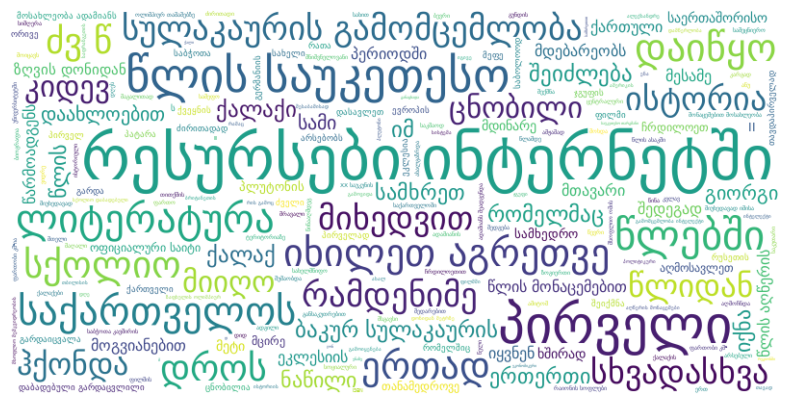

In [19]:
# !pip install matplotlib wordcloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of tokens into a single string
text = ' '.join([' '.join(tokens) for tokens in df.head(1000)['tokens']])


font_path = 'DejaVuSans.ttf'  # Adjust this path to where you saved the font

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### დავამატოთ მეტი ცვლადები

მონაცემების უფრო სიღრმისელად ანალიზისთვის და შემდეგ უკვე გაფილტვრისთვის, დაგვჭირდება დამატებითი ცვლადების დამატება. მაგალითად:
* **სიტყვების რაოდენობა**
* **სიმბოლოების რაოდენობა**
* **სიტყვები ხაზზე**
* **საშუალო სიტყვების სიგრძე**
* **ქართული სიმბოლოების წილი**
* **პუნქტუაციის წილი**
* **ცარიელი ადგილების წილი**
* **ციფრების წილი**
* **უნიკალური სიტყვების წილი**
* ...

პირველ რიგში განვსაზღვროთ ფუნქციები რომლებიც მიიღებენ ტექსტს და ჩვენთვის სასურველ სტატისტიკას დაგვიბრუნებენ:

In [20]:
import string

def count_words(text):
    """ითვლის ტექსტში სიტყვების რაოდენობას."""
    words = text.split()
    return len(words)

def count_characters(text):
    """ითვლის ტექსტში სიმბოლოების რაოდენობას."""
    return len(text)

def calculate_words_per_line(text):
    """ითვლის საშუალო სიტყვების რაოდენობას ხაზზე."""
    lines = text.split('\n')
    total_words = sum(len(line.split()) for line in lines)
    return total_words / len(lines) if lines else 0

def calculate_average_word_length(text):
    """ითვლის საშუალო სიტყვების სიგრძეს ტექსტში."""
    words = text.split()
    total_length = sum(len(word) for word in words)
    return total_length / len(words) if words else 0

def calculate_ka_char_share(text):
    """ითვლის ქართული სიმბოლოების წილს ტექსტში."""
    georgian_chars = [char for char in text if '\u10A0' <= char <= '\u10FF']
    return len(georgian_chars) / len(text) if text else 0

def calculate_punctuation_share(text):
    """ითვლის პუნქტუაციის სიმბოლოების წილს ტექსტში."""
    punctuation_chars = [char for char in text if char in string.punctuation]
    return len(punctuation_chars) / len(text) if text else 0

def calculate_whitespace_share(text):
    """ითვლის ცარიელი ადგილების (" ") წილს ტექსტში."""
    whitespace_chars = [char for char in text if char.isspace()]
    return len(whitespace_chars) / len(text) if text else 0

def calculate_digit_share(text):
    """ითვლის ციფრების წილს ტექსტში."""
    digit_chars = [char for char in text if char in "1234567890"]
    return len(digit_chars) / len(text) if text else 0

def calculate_unique_word_share(text):
    """ითვლის უნიკალური სიტყვების რაოდენობას ტექსტშ"""
    words = text.split()
    unique_word_share = len(set(words)) / len(words) if len(words) > 0 else 0    
    return unique_word_share

ახლა უკვე შეგვიძლია Dataframe-ში დავამატოთ შესაბამისი ცვლადები:

In [21]:
df["word_count"] = df["text"].apply(count_words)
df["character_count"] = df["text"].apply(count_characters)
df["words_per_line"] = df["text"].apply(calculate_words_per_line)
df["average_word_length"] = df["text"].apply(calculate_average_word_length)
df["ka_char_share"] = df["text"].apply(calculate_ka_char_share)
df["punctuation_share"] = df["text"].apply(calculate_punctuation_share)
df["whitespace_share"] = df["text"].apply(calculate_whitespace_share)
df["digit_share"] = df["text"].apply(calculate_digit_share)
df["unique_word_share"] = df["text"].apply(calculate_unique_word_share)

უკვე შეგვიძლია ავაგოთ თითოეული ცვლადის განაწილების გრაფიკები და კრიტიკული წეტილები (5%, 10%, 20%):

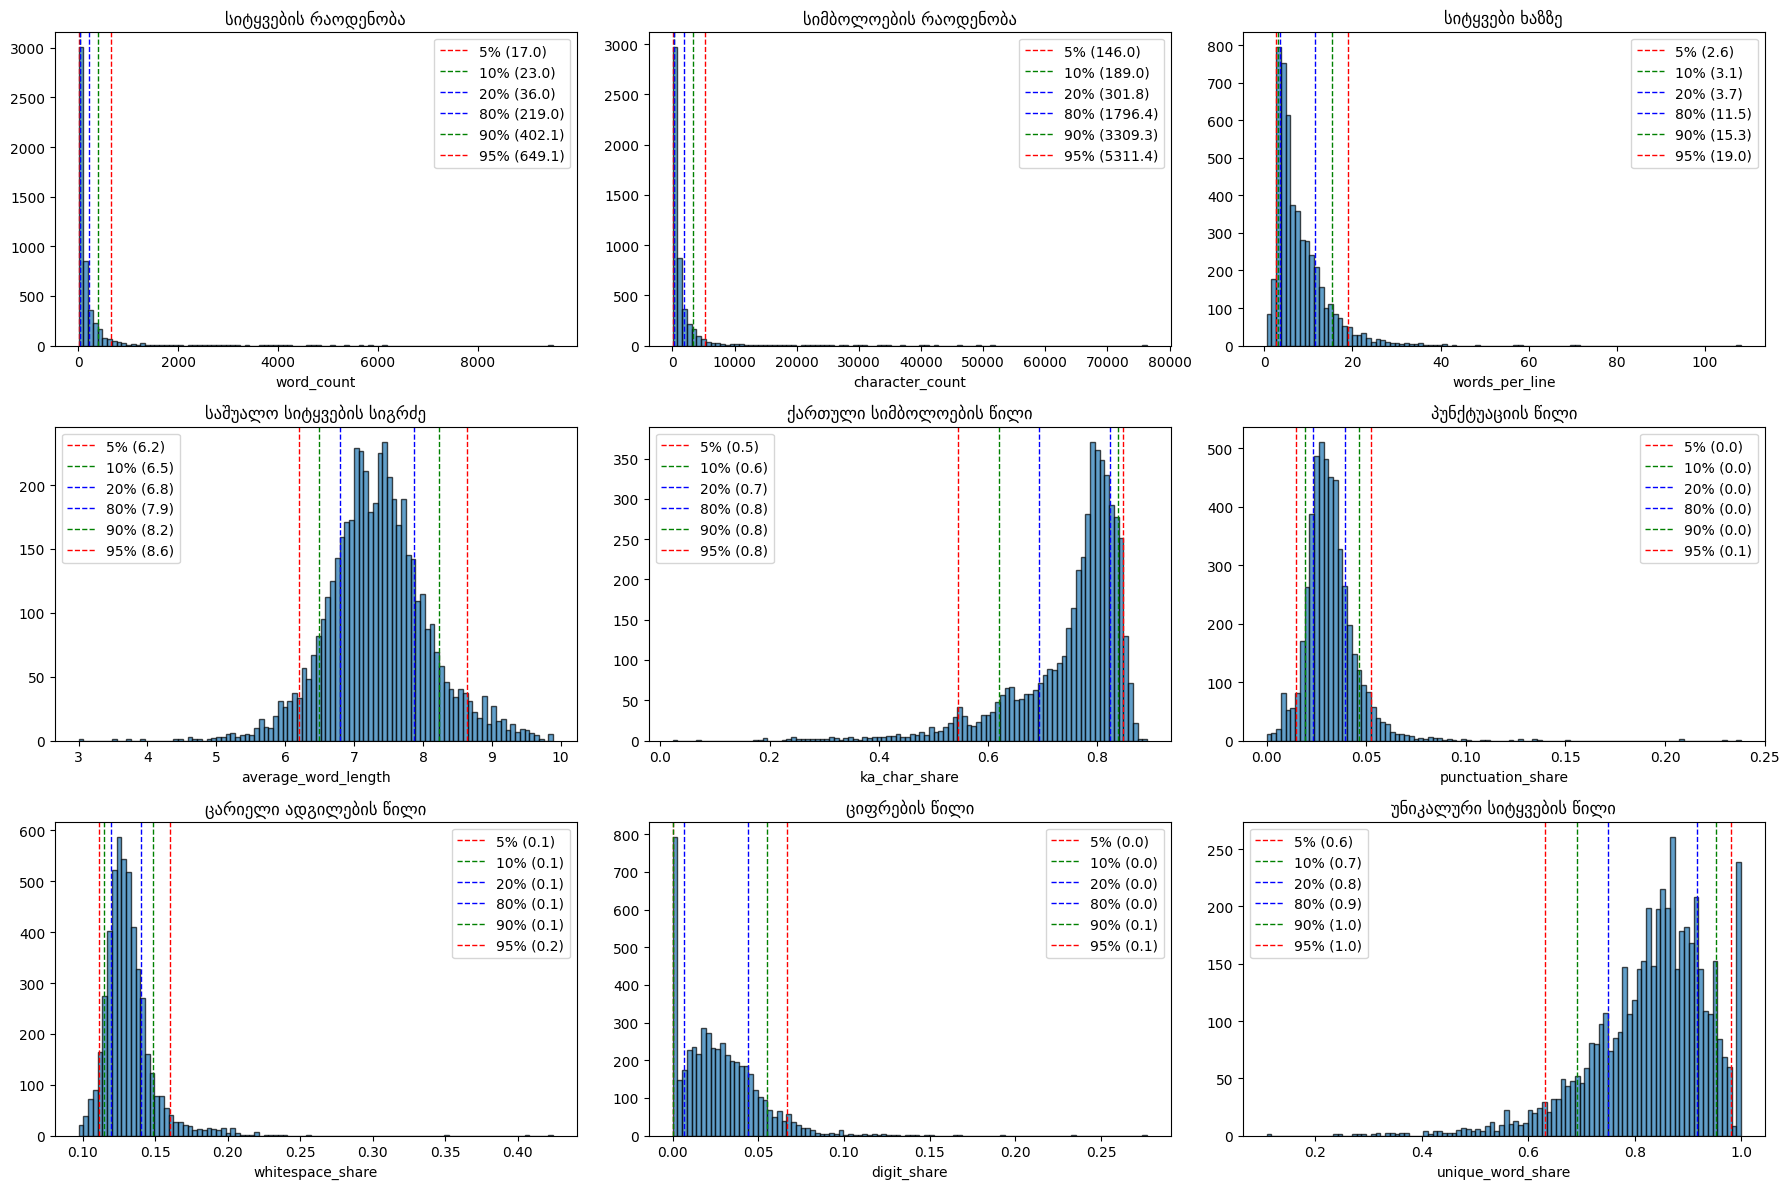

In [22]:
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# ცვლადების ქართული სახელები
titles_georgian = [
    "სიტყვების რაოდენობა", 
    "სიმბოლოების რაოდენობა", 
    "სიტყვები ხაზზე", 
    "საშუალო სიტყვების სიგრძე", 
    "ქართული სიმბოლოების წილი", 
    "პუნქტუაციის წილი", 
    "ცარიელი ადგილების წილი", 
    "ციფრების წილი", 
    "უნიკალური სიტყვების წილი"
]

variables = [
    "word_count", 
    "character_count", 
    "words_per_line", 
    "average_word_length", 
    "ka_char_share", 
    "punctuation_share", 
    "whitespace_share", 
    "digit_share", 
    "unique_word_share"
]

# გამოვსახოთ თითოეული ცვლადის განაწილება ხაზებით 5%, 10%, 20%, 80%, 90%, 95% ნიშნულებზე
plt.figure(figsize=(18, 12))
num_vars = len(variables)

percentiles = [5, 10, 20, 80, 90, 95]
colors = ['r', 'g', 'b', 'b', 'g', 'r']

for i, (var, title) in enumerate(zip(variables, titles_georgian), 1):
    plt.subplot((num_vars + 2) // 3, 3, i)
    plt.hist(df[var], bins=100, edgecolor='black', alpha=0.7)
    lines = []
    labels = []
    for perc, color in zip(percentiles, colors):
        perc_value = df[var].quantile(perc / 100.0)
        line = plt.axvline(perc_value, color=color, linestyle='dashed', linewidth=1)
        lines.append(line)
        labels.append(f'{perc}% ({perc_value:.1f})')
    plt.title(title)
    plt.xlabel(var)
    plt.legend(lines, labels)

plt.tight_layout()
plt.show()

რა დასკვნა შეგვიძლია გამოვიტანოთ გრაფიკებიდან?
* **word_count**: სტატიების უმეტესობა (95) შეიცავს 649-ზე ნაკლებ სიტყვას & გვაქვს რამდენიმე სტატია 2000+ სიტყვით.
* **character_count**: სტატიების უმეტესობა (95) შეიცავს 5300-ზე ნაკლებ სიმბოლოს & რამდენიმე სტატია შეიცავს 10000+ სიმბოლოს.
* **word_per_line**: სტატიების უმეტესობა (5%) შეიცავს 2.6-ზე ნაკლებ სიტყვას ხაზზე.
* **average_word_length**: გვაქვს სტატიები სადაც საშუალო სიტყვის სიგრძე 4-ზე ნაკლებია ან 10-ზე მეტია. 
* **ka_char_share**: ქართული სიმბოლოების წილი უმეტეს სტატიებში (95%) 0.8-ზე მეტია, თუმცა ჩანს გამონაკლისებიც.
* **punctuation_share**: პუნქტუაციის წილი უმეტეს სტატიებში (0; 0.1) შუალედშია მოქცეული.
* **whitespace_share**: გამოტოვებების (" ") წილი უმეტესად (0.1; 0.17) ინტერვალშია მოქცეული.
* **digit_share**: ციფრების წილი უმეტეს სტატიებში (95%) 0.1-ზე ნაკლებია.
* **unique_word_share**: უნიკალური სიტყვების წილი უმეტეს სტატიებში 0.5-0.6-ზე მეტია.

### მონაცემების გაფილტვრა

მას შემდეგ რაც წარმოდგენა შეგვექმნა ცვლადებზე, შეგვიძლია მონაცემთა გაფილტვრის რამდენიმე მეთოდი გამოვიყენოთ:
1) თითოეულ ცვლადში თვალით დავადგინოთ მისაღები საზღვრები (მაგალითად მოვაცილოთ სტატიები სადაც სიტყვების რაოდენობა 5-ზე ნაკლებია ან 5000-ზე მეტია);
2) ცვლადებს მოვაცილოთ ქვედა/ზედა X% (გამოდის რომ თითოეული ცვლადის მიხედვით ვაცილებთ 2X%);
3) ვნახოთ მკვლევარები/ორგანიზაციები რა საზღვრებს იყენებენ - გავიმეოროთ მათი ეტაპები.~

ამ შემთხვევაში გამოვიყენებთ ყველაზე მარტივ მეთოდს - 2)

In [23]:
# განვსაზღვროთ ცვლადები რომლებიც გვინდა გაფილტვრისთვის გამოვიყენოთ
filter_columns = [
    "word_count", 
    "character_count", 
    "words_per_line", 
    "average_word_length", 
    "ka_char_share", 
    "punctuation_share", 
    "whitespace_share", 
    "digit_share", 
    "unique_word_share"
]

# შევქმნათ dictionary შემდეგი სტრუქტურით {ცვლადის_სახელი: (ქვედა_ზღვარი, ზედა_ზღვარი), ...}
X = 0.025
bounds = {}
for col in filter_columns:
    lower_bound = df[col].quantile(X)
    upper_bound = df[col].quantile(1-X)
    bounds[col] = (lower_bound, upper_bound)

# შევინახოთ გაფილტრული Dataframe ცვლადში filtered_df
filtered_df = df.copy()
for col in filter_columns:
    lower_bound, upper_bound = bounds[col]
    filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

print(f"სტატიების რაოდენობა საწყის Dataframe-ში: {df.shape[0]}")
print(f"სტატიების რაოდენობა გაფილტვრის შემდეგ: {filtered_df.shape[0]}")

სტატიების რაოდენობა საწყის Dataframe-ში: 5000
სტატიების რაოდენობა გაფილტვრის შემდეგ: 3899


### სტანდარტიზაცია/ნორმალიზაცია

მონაცემთა სტანდარტიზაცია და ნორმალიზაცია მნიშვნელოვანი ეტაპია მონაცემთა დამუშავების პროცესში. ეს პროცესი უზრუნველყოფს მონაცემთა ერთგვაროვნებას და აადვილებს შემდგომ ანალიზს. განვიხილოთ რამდენიმე მაგალითი:

#### 1. ცარიელი სიმბოლოების (Whitespace) ნორმალიზაცია

ხშირად ტექსტში გვხვდება ზედმეტი ცარიელი სიმბოლოები. მათი სტანდარტიზაცია გააუმჯობესებს ტექსტის ხარისხს.

In [24]:
import re

def normalize_whitespace(text):
    # სამზე მეტი ცარიელი სიმბოლო ჩავანაცვლოთ სამი ცარიელი სიმბოლოთი
    return re.sub(r'\s{4,}', '   ', text)

# გამოვიყენოთ ფუნქცია ჩვენს მონაცემებზე
filtered_df['normalized_text'] = filtered_df['text'].apply(normalize_whitespace)

# შევამოწმოთ რამდენ სტრიქონზე იმოქმედა ცვლილებამ
affected_rows = (filtered_df['text'] != filtered_df['normalized_text']).sum()
percentage_affected = (affected_rows / len(filtered_df)) * 100

print(f"სტრიქონების რაოდენობა, სადაც მოხდა ცარიელი სიმბოლოების ნორმალიზაცია: {affected_rows}")
print(f"პროცენტული წილი: {percentage_affected:.2f}%")

სტრიქონების რაოდენობა, სადაც მოხდა ცარიელი სიმბოლოების ნორმალიზაცია: 746
პროცენტული წილი: 19.13%


#### 2. HTML თეგების მოცილება

ზოგჯერ ტექსტური მონაცემები შეიცავს HTML თეგებს, რომელთა მოცილებაც საჭიროა სუფთა ტექსტის მისაღებად.

In [25]:
import re

def remove_html_tags(text):
    # მოვაცილოთ HTML თეგები
    return re.sub(r'<[^>]+>', '', text)

# გამოვიყენოთ ფუნქცია ჩვენს მონაცემებზე
filtered_df['text_without_html'] = filtered_df['text'].apply(remove_html_tags)

# შევამოწმოთ რამდენ სტრიქონზე იმოქმედა ცვლილებამ
affected_rows = (filtered_df['text'] != filtered_df['text_without_html']).sum()
percentage_affected = (affected_rows / len(filtered_df)) * 100

print(f"სტრიქონების რაოდენობა, საიდანაც მოცილდა HTML თეგები: {affected_rows}")
print(f"პროცენტული წილი: {percentage_affected:.2f}%")

სტრიქონების რაოდენობა, საიდანაც მოცილდა HTML თეგები: 14
პროცენტული წილი: 0.36%


#### 3. ახალი ხაზის (Newline) სტანდარტიზაცია

ტექსტში შეიძლება გვხვდებოდეს სხვადასხვა ტიპის ახალი ხაზის სიმბოლოები (\n, \r, \r\n). მათი სტანდარტიზაცია გააუმჯობესებს ტექსტის ერთგვაროვნებას.

In [27]:
def standardize_newlines(text):
    # ჩავანაცვლოთ ყველა ტიპის ახალი ხაზის სიმბოლო \n-ით
    return re.sub(r'\r\n|\r|\n', '\n', text)

# გამოვიყენოთ ფუნქცია ჩვენს მონაცემებზე
filtered_df['standardized_text'] = filtered_df['text'].apply(standardize_newlines)

# შევამოწმოთ რამდენ სტრიქონზე იმოქმედა ცვლილებამ
affected_rows = (filtered_df['text'] != filtered_df['standardized_text']).sum()
percentage_affected = (affected_rows / len(filtered_df)) * 100

print(f"სტრიქონების რაოდენობა, სადაც მოხდა ახალი ხაზის სიმბოლოების სტანდარტიზაცია: {affected_rows}")
print(f"პროცენტული წილი: {percentage_affected:.2f}%")

სტრიქონების რაოდენობა, სადაც მოხდა ახალი ხაზის სიმბოლოების სტანდარტიზაცია: 0
პროცენტული წილი: 0.00%


ეს მაგალითები გვიჩვენებს, თუ როგორ შეიძლება გამოვიყენოთ სხვადასხვა მეთოდი ტექსტური მონაცემების სტანდარტიზაციისთვის. თითოეული ეს პროცესი ხელს უწყობს მონაცემთა ხარისხის გაუმჯობესებას და ამზადებს მას შემდგომი ანალიზისთვის.

მნიშვნელოვანია აღვნიშნოთ, რომ სტანდარტიზაციის პროცესი უნდა მოერგოს კონკრეტულ ამოცანას და მონაცემთა ტიპს. ზოგიერთ შემთხვევაში, გარკვეული ინფორმაცია (მაგალითად, HTML თეგები ან კონკრეტული ფორმატირება) შეიძლება მნიშვნელოვანი იყოს ანალიზისთვის, ამიტომ მათი მოცილება ან მოდიფიკაცია ფრთხილად უნდა მოხდეს.